<h1>Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder

<h1>Load The Dataset

In [6]:
df=pd.read_csv("/content/car.csv")
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<h1>Handling Mising Values

In [9]:
# Handle missing values by imputing or dropping.
# Encode categorical features.
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df.isnull().sum()

/tmp/ipython-input-1228002631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


<h1>Encoding the categorical columns

In [10]:
le=LabelEncoder()
df['origin']=le.fit_transform(df['origin'])
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,2,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,2,buick skylark 320


<h1>Checking For Outliers

<Axes: >

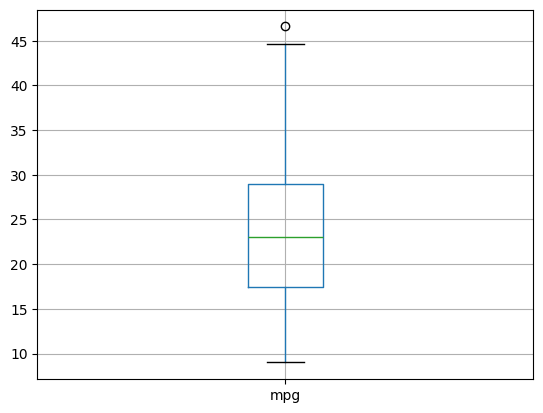

In [11]:
df.boxplot(column='mpg')

<Axes: xlabel='origin', ylabel='mpg'>

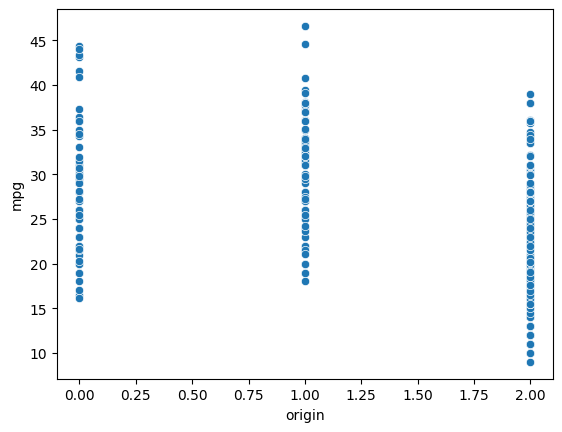

In [12]:
sns.scatterplot(x='origin', y='mpg', data=df )

<h1>Feature Selection By Corelation Heatmap

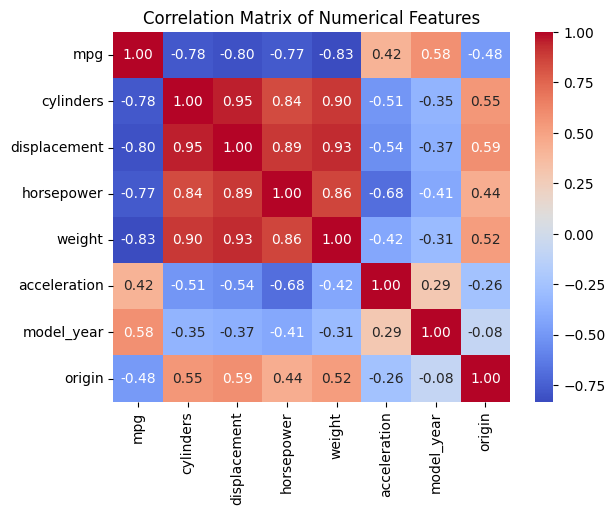

In [13]:
df_cor=df.select_dtypes(include=np.number)
op=df_cor.corr()
sns.heatmap(op, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [14]:
x=df.drop(['mpg', 'name','origin'],axis=1)
y=df['mpg']

<h1>Spliting the Data in Training and Testing Data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<h1>Modeling

In [16]:
model=LinearRegression()
model.fit(x_train,y_train)



LinearRegression()

<h1>Predicting

In [17]:
y_pred=model.predict(x_test)


<h1>Evaluation

In [18]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 9.441014238263561
R-squared: 0.824406942699022


<h1>Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

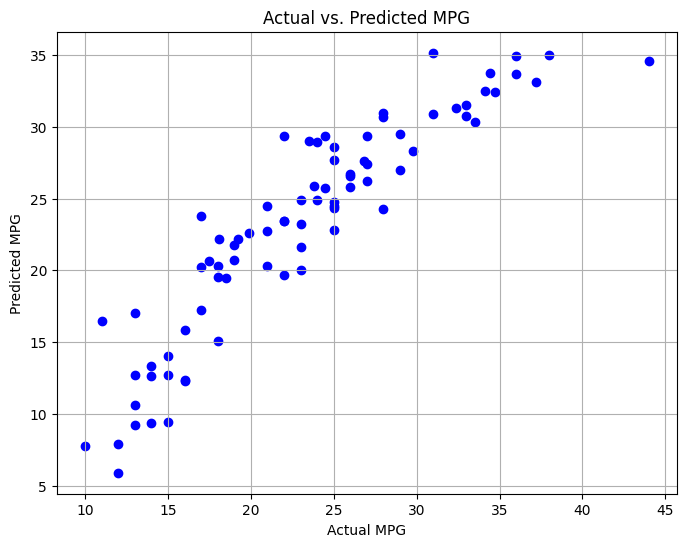

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred,color='blue')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs. Predicted MPG')
plt.grid(True)
plt.show

<h1>

<h1> To Understand the Effect of Each Variable

In [23]:
# To Understand the Effect of Each Variable
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(x.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
cylinders: 0.07
displacement: 0.00
horsepower: 0.00
weight: -0.01
acceleration: 0.08
model_year: 0.80
Intercept: -18.68
